In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pymer4 import Lmer


# Experiment 1

Research Question: Do people attribute more causal responsibility to agents than objects?
## Stimulus
conditions
2 x 2 x 2
Agent (Animate vs Inanimate)
Outcome (in vs. out)
Counterfactual (in vs out)

Importantly, the impact of the agent on the patient is constant across animate and inanimate conditions


| Condition                | Agent = Animate                                                       | Agent = Inanimate                                                     |
|--------------------------|-----------------------------------------------------------------------|-----------------------------------------------------------------------|
| Outcome = In  / CF = Out | ![SegmentLocal](Experiment_1/Figures/gifs/3_a_in_out.gif "segment")   | ![SegmentLocal](Experiment_1/Figures/gifs/3_p_in_out.gif "segment")   |
| Outcome = Out / CF = In  | ![SegmentLocal](Experiment_1/Figures/gifs/19_a_out_in.gif "segment")  | ![SegmentLocal](Experiment_1/Figures/gifs/19_p_out_in.gif "segment")  |
| Outcome = In / CF = In   | ![SegmentLocal](Experiment_1/Figures/gifs/12_a_in_in.gif "segment")   | ![SegmentLocal](Experiment_1/Figures/gifs/12_p_in_in.gif "segment")   |
| Outcome = Out / CF = Out | ![SegmentLocal](Experiment_1/Figures/gifs/16_a_out_out.gif "segment") | ![SegmentLocal](Experiment_1/Figures/gifs/16_p_out_out.gif "segment") |

**Prompt**
**"Ball A caused Ball B to land in/miss the pocket"**


In [14]:
dat = pd.read_csv('../Data/Experiment_1/experiment_data_10_29_2021.csv', index_col=0)

## Manipulation check
* We see a large difference in animacy ratings between agentic and physical agents.

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


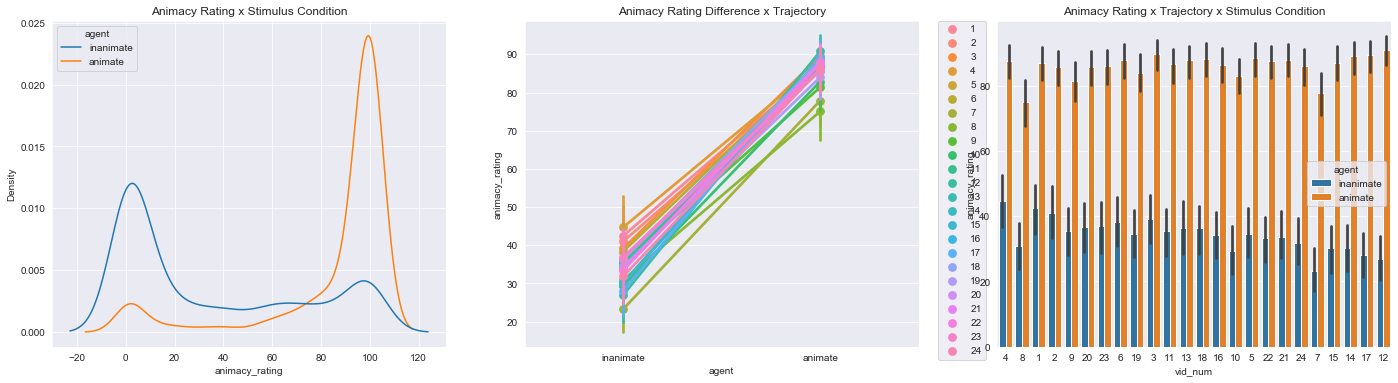

In [15]:
f, a = plt.subplots(figsize=(24, 6), nrows=1, ncols=3)

# Distribution of Animacy Ratings
g = sns.kdeplot(data=dat, x='animacy_rating', hue='agent', ax=a[0] )
# Change in Animacy rating by trajectory
sns.pointplot(data=dat, x='agent', y='animacy_rating', hue='vid_num', ax=a[1])
a[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
# difference in animacy rating by trajectory sorted from smallest to largest
anim_diffs = dat.groupby(['vid_num', 'agent']).mean().animacy_rating
# sort the videos based on the difference of the mean animacy ratings per video
anim_diffs = anim_diffs.diff(-1).xs('animate', level=1).abs().sort_values()
sns.barplot(data=dat, x='vid_num', y='animacy_rating', hue='agent', order=anim_diffs.index.tolist(), ax=a[2]);
a[0].title.set_text('Animacy Rating x Stimulus Condition');
a[1].title.set_text('Animacy Rating Difference x Trajectory')
a[2].title.set_text('Animacy Rating x Trajectory x Stimulus Condition');


* When a physical agent changes the outcome from (counterfacutal) out to in, it is perceived to be more animate, than when it changes the outcome from in to out. (first and third bar pairs)

In [17]:
m1 = Lmer('animacy_rating ~ agent + outcome + cf + (outcome*cf) + (1|subject_id)+ (1|vid_num)', data=dat)
m1.fit()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/rpy2/robjects/vectors.py:980: UserWarning: R object inheriting from "POSIXct" but without attribute "tzone".
  warnings.warn('R object inheriting from "POSIXct" but without '


Formula: animacy_rating~agent+outcome+cf+(outcome*cf)+(1|subject_id)+(1|vid_num)

Family: gaussian	 Inference: parametric

Number of observations: 4944	 Groups: {'subject_id': 103.0, 'vid_num': 24.0}

Log-likelihood: -24088.615 	 AIC: 48177.229

Random effects:

Empty DataFrame
Columns: [Name, Var, Std]
Index: []

                    IV1   IV2    Corr
subject_id  (Intercept)  None  12.255
vid_num     (Intercept)  None   0.816
Residual           None  None  30.947

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),82.177,79.055,85.299,1.593,97.587,51.586,0.000,***
agentinanimate,-51.731,-53.457,-50.006,0.880,4817.000,-58.768,0.000,***
outcomeout,4.043,1.434,6.652,1.331,19.999,3.037,0.007,**
cfout,7.569,4.960,10.178,1.331,19.999,5.686,0.000,***
outcomeout:cfout,-7.681,-11.371,-3.992,1.882,19.999,-4.080,0.001,***


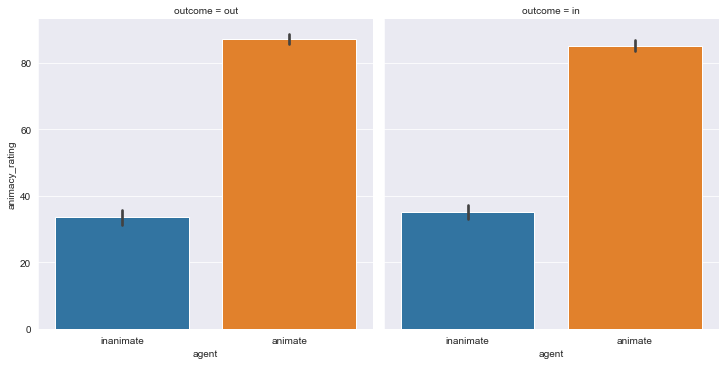

In [22]:
sns.catplot(x='agent', y='animacy_rating', col='outcome', kind='bar', data=dat);

In [18]:
sns.catplot(x='cf_dependence', y='animacy_rating',
            hue='cf', col='outcome', kind='bar', data=dat);


ValueError: Could not interpret input 'cf_dependence'

Causal Ratings

In [20]:
sns.catplot(x='agent', y='causal_rating', col='cf_dependence', data=dat, kind='bar')

KeyError: 'cf_dependence'

Across the four outcome-counterfactual conditions there are now effect of agency on causal rating.
As expected, there is an effect of counterfactual shown as the difference in causal rating when the counterfactual is different from the outcome.

In [9]:
dat['cf_dependence']= dat.apply(lambda row: row['outcome'] != row['cf'], axis=1)

In [12]:

m1 = Lmer('causal_rating ~ cf_dependence + agent + (cf_dependence*agent)+ (1|subject_id) + (1|vid_num)', data=dat)
m1.fit()


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/rpy2/robjects/vectors.py:980: UserWarning: R object inheriting from "POSIXct" but without attribute "tzone".
  warnings.warn('R object inheriting from "POSIXct" but without '


Formula: causal_rating~cf_dependence+agent+(cf_dependence*agent)+(1|subject_id)+(1|vid_num)

Family: gaussian	 Inference: parametric

Number of observations: 4944	 Groups: {'subject_id': 103.0, 'vid_num': 24.0}

Log-likelihood: -24174.099 	 AIC: 48348.197

Random effects:

Empty DataFrame
Columns: [Name, Var, Std]
Index: []

                    IV1   IV2    Corr
subject_id  (Intercept)  None   9.724
vid_num     (Intercept)  None  22.522
Residual           None  None  31.295

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),39.278,26.280,52.275,6.632,23.373,5.923,0.000,***
cf_dependenceTRUE,32.692,14.503,50.881,9.280,22.410,3.523,0.002,**
agentinanimate,-0.383,-2.850,2.085,1.259,4816.000,-0.304,0.761,
cf_dependenceTRUE:agentinanimate,-0.906,-4.395,2.583,1.780,4816.000,-0.509,0.611,


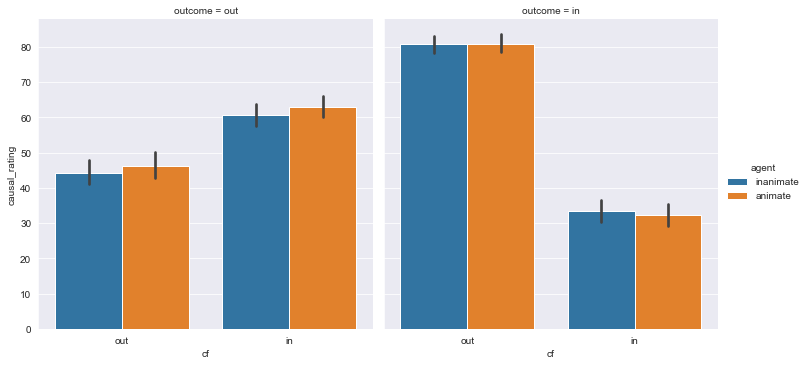

In [7]:
sns.catplot(x='cf', y='causal_rating', hue='agent', col='outcome', kind='bar', data=dat);

Note on experiment 4 from tobi
quick high level thought: if this experiment works out in the expected way (higher causal rating for the agentive orange vs. the physical orange), then i think this would suggest something like the following: agency by itself is not important for causal judgments, agency only matters to the extent that it affects the relevant counterfactual contrast, and that's what matters for causal judgments.